In [29]:
import numpy as np
import pandas as pd

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [31]:
# Loading data and making a copy of it
data = pd.read_csv('Boston.csv')
df = data.copy()
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
# Creating dependent and independent variables
X = df.drop('median home price', axis=1)
Y = df[['median home price']]
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


In [33]:
Z = X.columns
columnn = [Z]
columnn

[Index(['Crime Rate', 'Residential Proportion',
        'non-retail business acres/Town', 'Charles River', 'NO2 concentration',
        'Average Rooms/Dwelling.', 'Prior Built Units Proportion',
        'Distance to Employment Centres', 'Radial Highways Distance',
        'ValueProperty/tax rate', 'Teacher/town', 'blacks/town',
        'Lower Status Percent'],
       dtype='object')]

In [34]:
# Normalization
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
scaling_object = MinMaxScaler()
x_scaling = scaling_object.fit_transform(X)
# Making dataframe of X_scaling as it is returned as N-D Array
x_scaled = pd.DataFrame(x_scaling, columns=columnn)
x_scaled.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [35]:
# Spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=25, shuffle=True)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


In [36]:
# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# Getting predictions from the model
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [38]:
# Calculation R2 score for both training and testing x data
from sklearn.metrics import r2_score
train_r2_score = r2_score(y_train, train_pred)
test_r2_score = r2_score(y_test, test_pred)
print(f'Traing R2 score is: {train_r2_score}')
print(f'Testing R2 score is: {test_r2_score}')

Traing R2 score is: 0.7435787589010061
Testing R2 score is: 0.7133593313710354


In [39]:
# Ploting residual plot
#!pip install yellowbrick

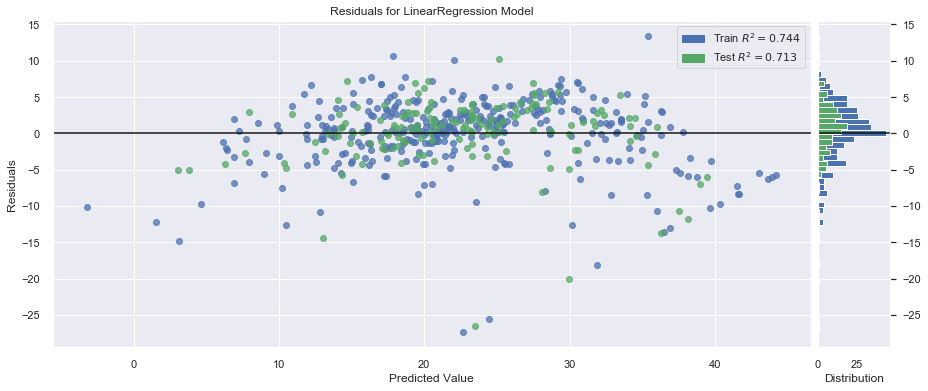

In [40]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(model)
visualizer.fit(x_train.values, y_train.values)  
visualizer.score(x_test.values, y_test.values)  
visualizer.poof()

In [41]:
# Applying polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
# Transform the features to high degree features
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

In [42]:
# Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Predicting on training and testing data
poly_train_predictions = poly_model.predict(x_train_poly)
poly_test_predictions = poly_model.predict(x_test_poly)

In [44]:
# R2 score
poly_train_r2 = r2_score(y_train, poly_train_predictions)
poly_test_r2 = r2_score(y_test, poly_test_predictions)
print(f'R2 score for poly trained data: {poly_train_r2}')
print(f'R2 score for poly test data: {poly_test_r2}')

R2 score for poly trained data: 0.9306558488335578
R2 score for poly test data: 0.7665134389984855


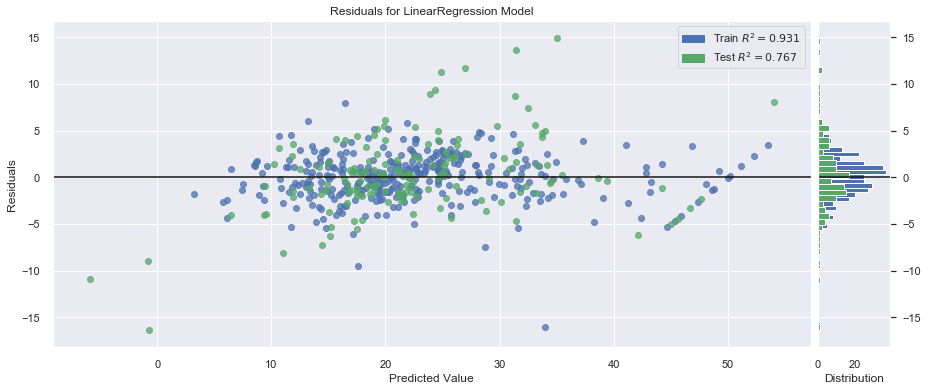

In [47]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(poly_model)
visualizer.fit(x_train_poly, y_train.values)  
visualizer.score(x_test_poly, y_test.values)  
visualizer.poof()

In [48]:
# Model complexity Vs Preformance
from sklearn.metrics import mean_squared_error
mse_train=[]
mse_test=[]
r2_train=[]
r2_test=[]
for i in range(1,8):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(x_train), poly_reg.fit_transform(x_test)
    
    poly = LinearRegression()
    poly.fit(X_tr_poly, y_train)
   
    y_tr_predicted, y_tst_predict = poly.predict(X_tr_poly), poly.predict(X_tst_poly)
   
    r2_train.append(r2_score(y_train, y_tr_predicted))
    r2_test.append(r2_score(y_test, y_tst_predict))
    
    mse_train.append(mean_squared_error(y_train, y_tr_predicted))
    mse_test.append(mean_squared_error(y_test, y_tst_predict))

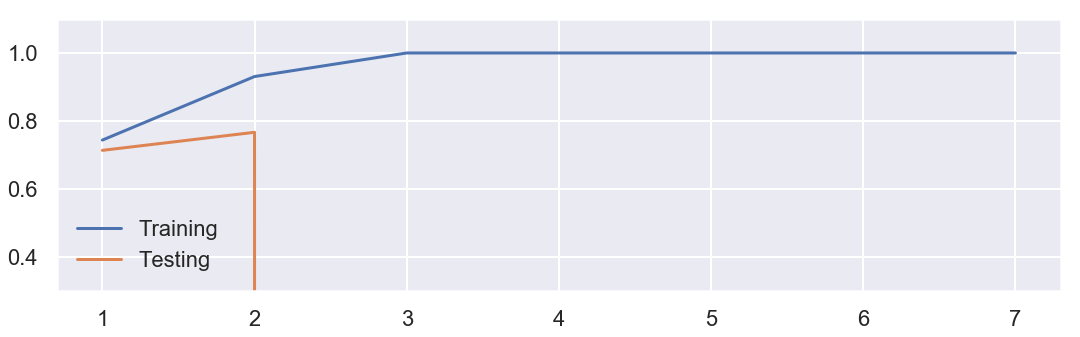

In [49]:
# Comparison of R2 scores
plt.figure(figsize=(18,5))
sns.set_context('poster')
#plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,8)), y=r2_train, label='Training')
#plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,8)), y=r2_test, label='Testing')
plt.ylim(0.3, 1.1)
plt.show()

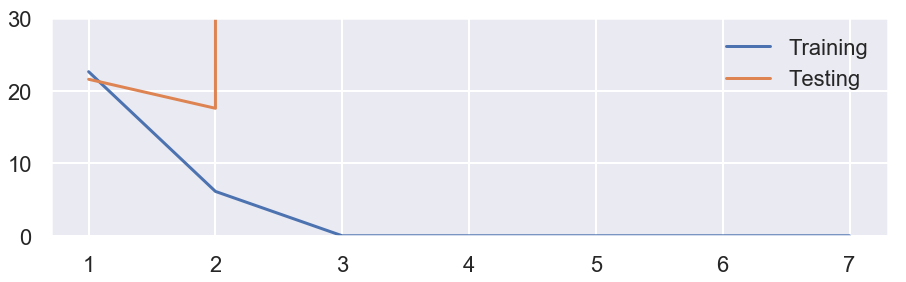

In [50]:
plt.figure(figsize=(15,4))
#plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,8)), y=mse_train, label='Training')
#plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,8)), y=mse_test, label='Testing')
plt.ylim(0, 30)
plt.show()

In [ ]:
43ex